In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the training data
train_data = pd.read_excel('01 Train Data.xlsx')

In [3]:
train_data.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed


In [4]:
train_data.tail()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
4889,Saif ali,saifali@xyz.com,1,NaN,Data Visualization using Power BI,1.949319e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2021,9.0,3,2,NaN
4890,Lankesh,lankesh@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,NaN,NaN,Students,2021,7.2,4,3,NaN
4891,Sanjay,sanjay@xyz.com,1,NaN,Data Visualization using Power BI,1.949328e+09,NaN,Free Order,USD,0,...,Attending,wilson college,NaN,NaN,Students,2021,8.5,2,3,NaN
4892,Sushmita,sushmita@xyz.com,1,NaN,Data Visualization using Power BI,1.949330e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",NaN,NaN,Students,2021,6.5,5,5,NaN
4893,Vipul,vipul@xyz.com,1,NaN,Data Visualization using Power BI,1.949332e+09,NaN,Free Order,USD,0,...,Attending,dkte society's textile and engineering institu...,NaN,NaN,Students,2021,6.6,4,5,NaN


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      4894 non-null   object 
 5   Attendee #                                                       4490 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

In [6]:
train_data.describe()

,Quantity,Price Tier,Attendee #,Group,Total Paid,Fees Paid,Eventbrite Fees,Eventbrite Payment Processing,CGPA,Speaking Skills,ML Knowledge
count,4894.0,0.0,4.490000e+03,0.0,4894.0,4490.0,4894.0,4894.0,4894.000000,4894.000000,4894.000000
mean,1.0,NaN,2.537633e+09,NaN,0.0,0.0,0.0,0.0,8.038476,3.392930,3.380466
std,0.0,NaN,8.520970e+08,NaN,0.0,0.0,0.0,0.0,1.005184,1.186768,1.185233
min,1.0,NaN,1.937670e+09,NaN,0.0,0.0,0.0,0.0,6.200000,1.000000,1.000000
25%,1.0,NaN,1.984708e+09,NaN,0.0,0.0,0.0,0.0,7.200000,2.000000,2.000000
50%,1.0,NaN,2.081662e+09,NaN,0.0,0.0,0.0,0.0,7.900000,3.000000,3.000000
75%,1.0,NaN,2.465114e+09,NaN,0.0,0.0,0.0,0.0,8.900000,5.000000,4.000000
max,1.0,NaN,4.322836e+09,NaN,0.0,0.0,0.0,0.0,9.900000,5.000000,5.000000


In [7]:
train_data.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         4894
Ticket Type                                                           0
Attendee #                                                          404
Group                                                              4894
Order Type                                                            0
Currency                                                            404
Total Paid                                                            0
Fees Paid                                                           404
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [8]:
# Remove rows with missing values in the target variable
train_data.dropna(subset=['Placement Status'], inplace=True)

In [9]:
# Data preprocessing for the training data
train_data['CGPA'].fillna(train_data['CGPA'].median(), inplace=True)
train_data['Speaking Skills'].fillna(train_data['Speaking Skills'].median(), inplace=True)
train_data['ML Knowledge'].fillna(train_data['ML Knowledge'].median(), inplace=True)

In [10]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Ticket Type', 'Order Type'])

In [11]:
# Select features for training
X_train = train_data[['Quantity', 'CGPA', 'Speaking Skills', 'ML Knowledge']]
y_train = train_data['Placement Status']

In [12]:
# Train a machine learning model (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Load the test data
test_data = pd.read_excel('02 Test Data.xlsx')

In [14]:
# Data preprocessing for the test data (similar to training data preprocessing)
test_data['CGPA'].fillna(test_data['CGPA'].median(), inplace=True)
test_data['Speaking Skills'].fillna(test_data['Speaking Skills'].median(), inplace=True)
test_data['ML Knowledge'].fillna(test_data['ML Knowledge'].median(), inplace=True)

In [15]:
# Encode categorical variables 
test_data = pd.get_dummies(test_data, columns=['Ticket Type', 'Order Type'])

In [16]:
# Select features for prediction
X_test = test_data[['Quantity', 'CGPA', 'Speaking Skills', 'ML Knowledge']]

In [17]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [18]:
# Map the predictions to '0' (Placed) and '1' (Not Placed)
predictions = ['0' if prediction == 'Placed' else '1' for prediction in predictions] 

In [19]:
# Add the predictions to the test data
test_data['Placement Prediction'] = predictions


In [20]:
# Save the test data with predictions to a new Excel file
test_data.to_excel('Test_Data_with_Predictions.xlsx', index=False)

In [21]:
selected_columns = test_data[['First Name', 'Email ID', 'Placement Prediction']]

In [22]:
selected_columns.head(60)

,First Name,Email ID,Placement Prediction
0,Sahil,sahil@xyz.com,1
1,Amrita,amrita@xyz.com,1
2,Mamta,mamta@xyz.com,1
3,Bhagyashri,bhagyashri@xyz.com,1
4,Divyanshu,divyanshu@xyz.com,1
5,Aditya,aditya@xyz.com,1
6,Akshay,akshay@xyz.com,1
7,Vaishnavi,vaishnavi@xyz.com,1
8,Pranita,pranita@xyz.com,1
9,Pratik,pratik@xyz.com,1


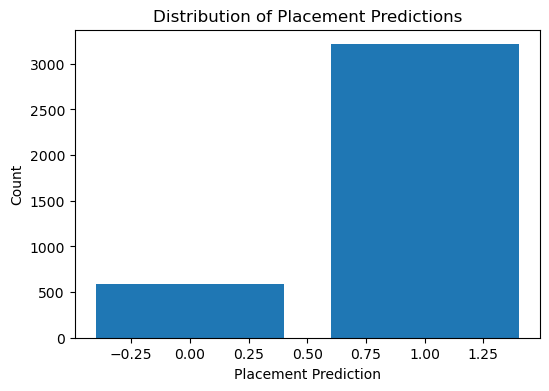

In [23]:
import matplotlib.pyplot as plt

# Load the test data with predictions
test_data = pd.read_excel('Test_Data_with_Predictions.xlsx')

# Create a bar chart for Placement Predictions
plt.figure(figsize=(6, 4))
plt.bar(test_data['Placement Prediction'].value_counts().index, test_data['Placement Prediction'].value_counts())
plt.xlabel('Placement Prediction')
plt.ylabel('Count')
plt.title('Distribution of Placement Predictions')
plt.show()